<a href="https://colab.research.google.com/github/waltermayor/DigitalImageProcessing_colab/blob/master/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import urllib.request
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline




In [0]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  resp = urllib.request.urlopen(data)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  
  return image

<IPython.core.display.Javascript object>

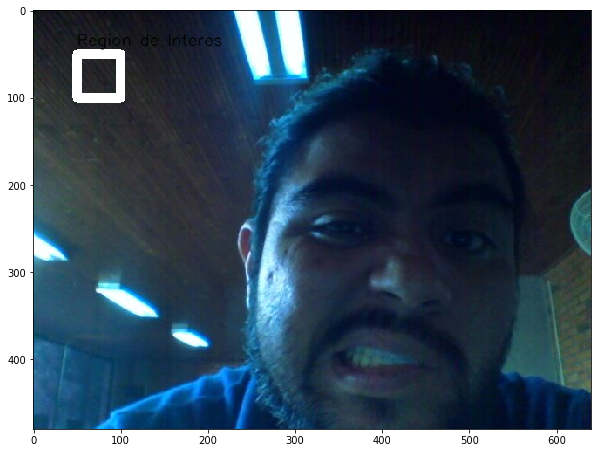

In [9]:


img = take_photo()
img = cv2.rectangle(img,(50,50),(100,100),(255,255,255),thickness =10, lineType=8, shift=0)#recuadro
img=cv2.putText(img,"Region de Interes",(50,40), cv2.FONT_ITALIC,0.6,(0,0,0),1,cv2.LINE_AA)#texto
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()